# Thu thập dữ liệu

## Ngữ cảnh, câu chuyện gì khiến nhóm sinh viên thực hiện việc tìm kiếm dữ liệu?

Nguyên nhân nhóm chọn bộ dữ liệu là do có hứng thú với ngành nhân sự. Ngoài ra do sắp tốt nghiệp nên nhóm cũng muốn tìm hiểu những yếu tố nào ảnh hưởng đến lương bổng. Có phải làm lâu năm cho 1 công ty sẽ được lương cao hay không? Từ đó có thể cải thiện, học hỏi thêm để đáp ứng nhu cầu của các doanh nghiệp trong tương lai.

## Dữ liệu mà nhóm sinh viên là về chủ đề gì và được lấy từ nguồn nào?

- Bộ dữ liệu cung cấp thông tin về sự sụt giảm hay tiêu hao nhân viên và các yếu tố ảnh hưởng đến nó.
- Nguồn: https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors

## Người ta có cho phép sử dụng dữ liệu như thế này hay không? Ví dụ: cần kiểm tra thử License của dữ liệu là gì?

**License: CC0 1.0 Universal (CC0 1.0) - Public Domain Dedication** </br>
*No Copyright - You can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission.*


# Khám phá dữ liệu

## Import các thư viện cần thiết

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)

In [22]:
data = pd.read_csv("HR_Analytics.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Dữ liệu có bao nhiêu cột? Bao nhiêu dòng?

In [23]:
print("Dữ liệu có", data.shape[0], "dòng và", data.shape[1], "cột")

Dữ liệu có 1470 dòng và 35 cột


## Có dữ liệu nào bị thiếu không?

In [24]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Không có cột nào bị thiếu dữ liệu

## Dữ liệu có trùng lặp không

In [25]:
data.duplicated().any()

False

Dữ liệu không có dòng nào trùng lặp

## Ý nghĩa của mỗi cột là gì? Từng cột đang có kiểu dữ liệu là gì? Có phù hợp hay chưa?

Những thông tin này đã được cung cấp ở phần mô tả dữ liệu ở trên kaggle

In [26]:
mean_col = pd.read_csv("columns_meaning.csv", index_col = 0)
mean_col

temp = []
for i in mean_col.index:
    try:
        type(data[i][0].item())
        temp.append('numerical')
    except:
        temp.append('categorical')

mean_col['type'] = temp

mean_col

,meaning,type
Age,Tuổi của nhân viên.,numerical
Attrition,Khả năng nhân viên đã rời khỏi tổ chức hay chưa.,categorical
BusinessTravel,Tần suất đi công tác của nhân viên.,categorical
DailyRate,Mức lương hàng ngày của nhân viên.,numerical
Department,Phòng ban mà nhân viên làm việc.,categorical
DistanceFromHome,Khoảng cách từ nhà đến nơi làm việc tính bằng dặm cho nhân viên.,numerical
Education,Trình độ học vấn đã đạt được của nhân viên.,numerical
EducationField,Lĩnh vực đào tạo của nhân viên.,categorical
EmployeeCount,Tổng số nhân viên trong tổ chức.,numerical
EmployeeNumber,Mã định danh duy nhất cho mỗi hồ sơ nhân viên.,numerical


## Với mỗi cột có kiểu dữ liệu được phân bố như thế nào?

### Đối với cột dữ liệu dạng số

In [27]:
def col_info(col, array):
    temp = np.array(array[col])
    temp = temp[np.invert(np.isnan(temp))]
    data = []
    # min
    data.append(np.min(temp))
    # 3 quartile
    for i in range(25, 100, 25):
        data.append(np.percentile(temp, i, method='linear'))
    # max
    data.append(np.max(temp))
    return data

In [28]:
num_col_info_df = pd.DataFrame(index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
for i in data._get_numeric_data():
    num_col_info_df[i] = col_info(i, data)
num_col_info_df

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
min,18.0,102.0,1.0,1.0,1.0,1.00,1.0,30.00,1.0,1.0,1.0,1009.0,2094.0,0.0,11.0,3.0,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
lower_quartile,30.0,465.0,2.0,2.0,1.0,491.25,2.0,48.00,2.0,1.0,2.0,2911.0,8047.0,1.0,12.0,3.0,2.0,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
median,36.0,802.0,7.0,3.0,1.0,1020.50,3.0,66.00,3.0,2.0,3.0,4919.0,14235.5,2.0,14.0,3.0,3.0,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
upper_quartile,43.0,1157.0,14.0,4.0,1.0,1555.75,4.0,83.75,3.0,3.0,4.0,8379.0,20461.5,4.0,18.0,3.0,4.0,80.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,1499.0,29.0,5.0,1.0,2068.00,4.0,100.00,4.0,5.0,4.0,19999.0,26999.0,9.0,25.0,4.0,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0


Ta vẽ biểu đồ Boxplot để thể hiện sự phân bố dữ liệu với các cột dạng số.

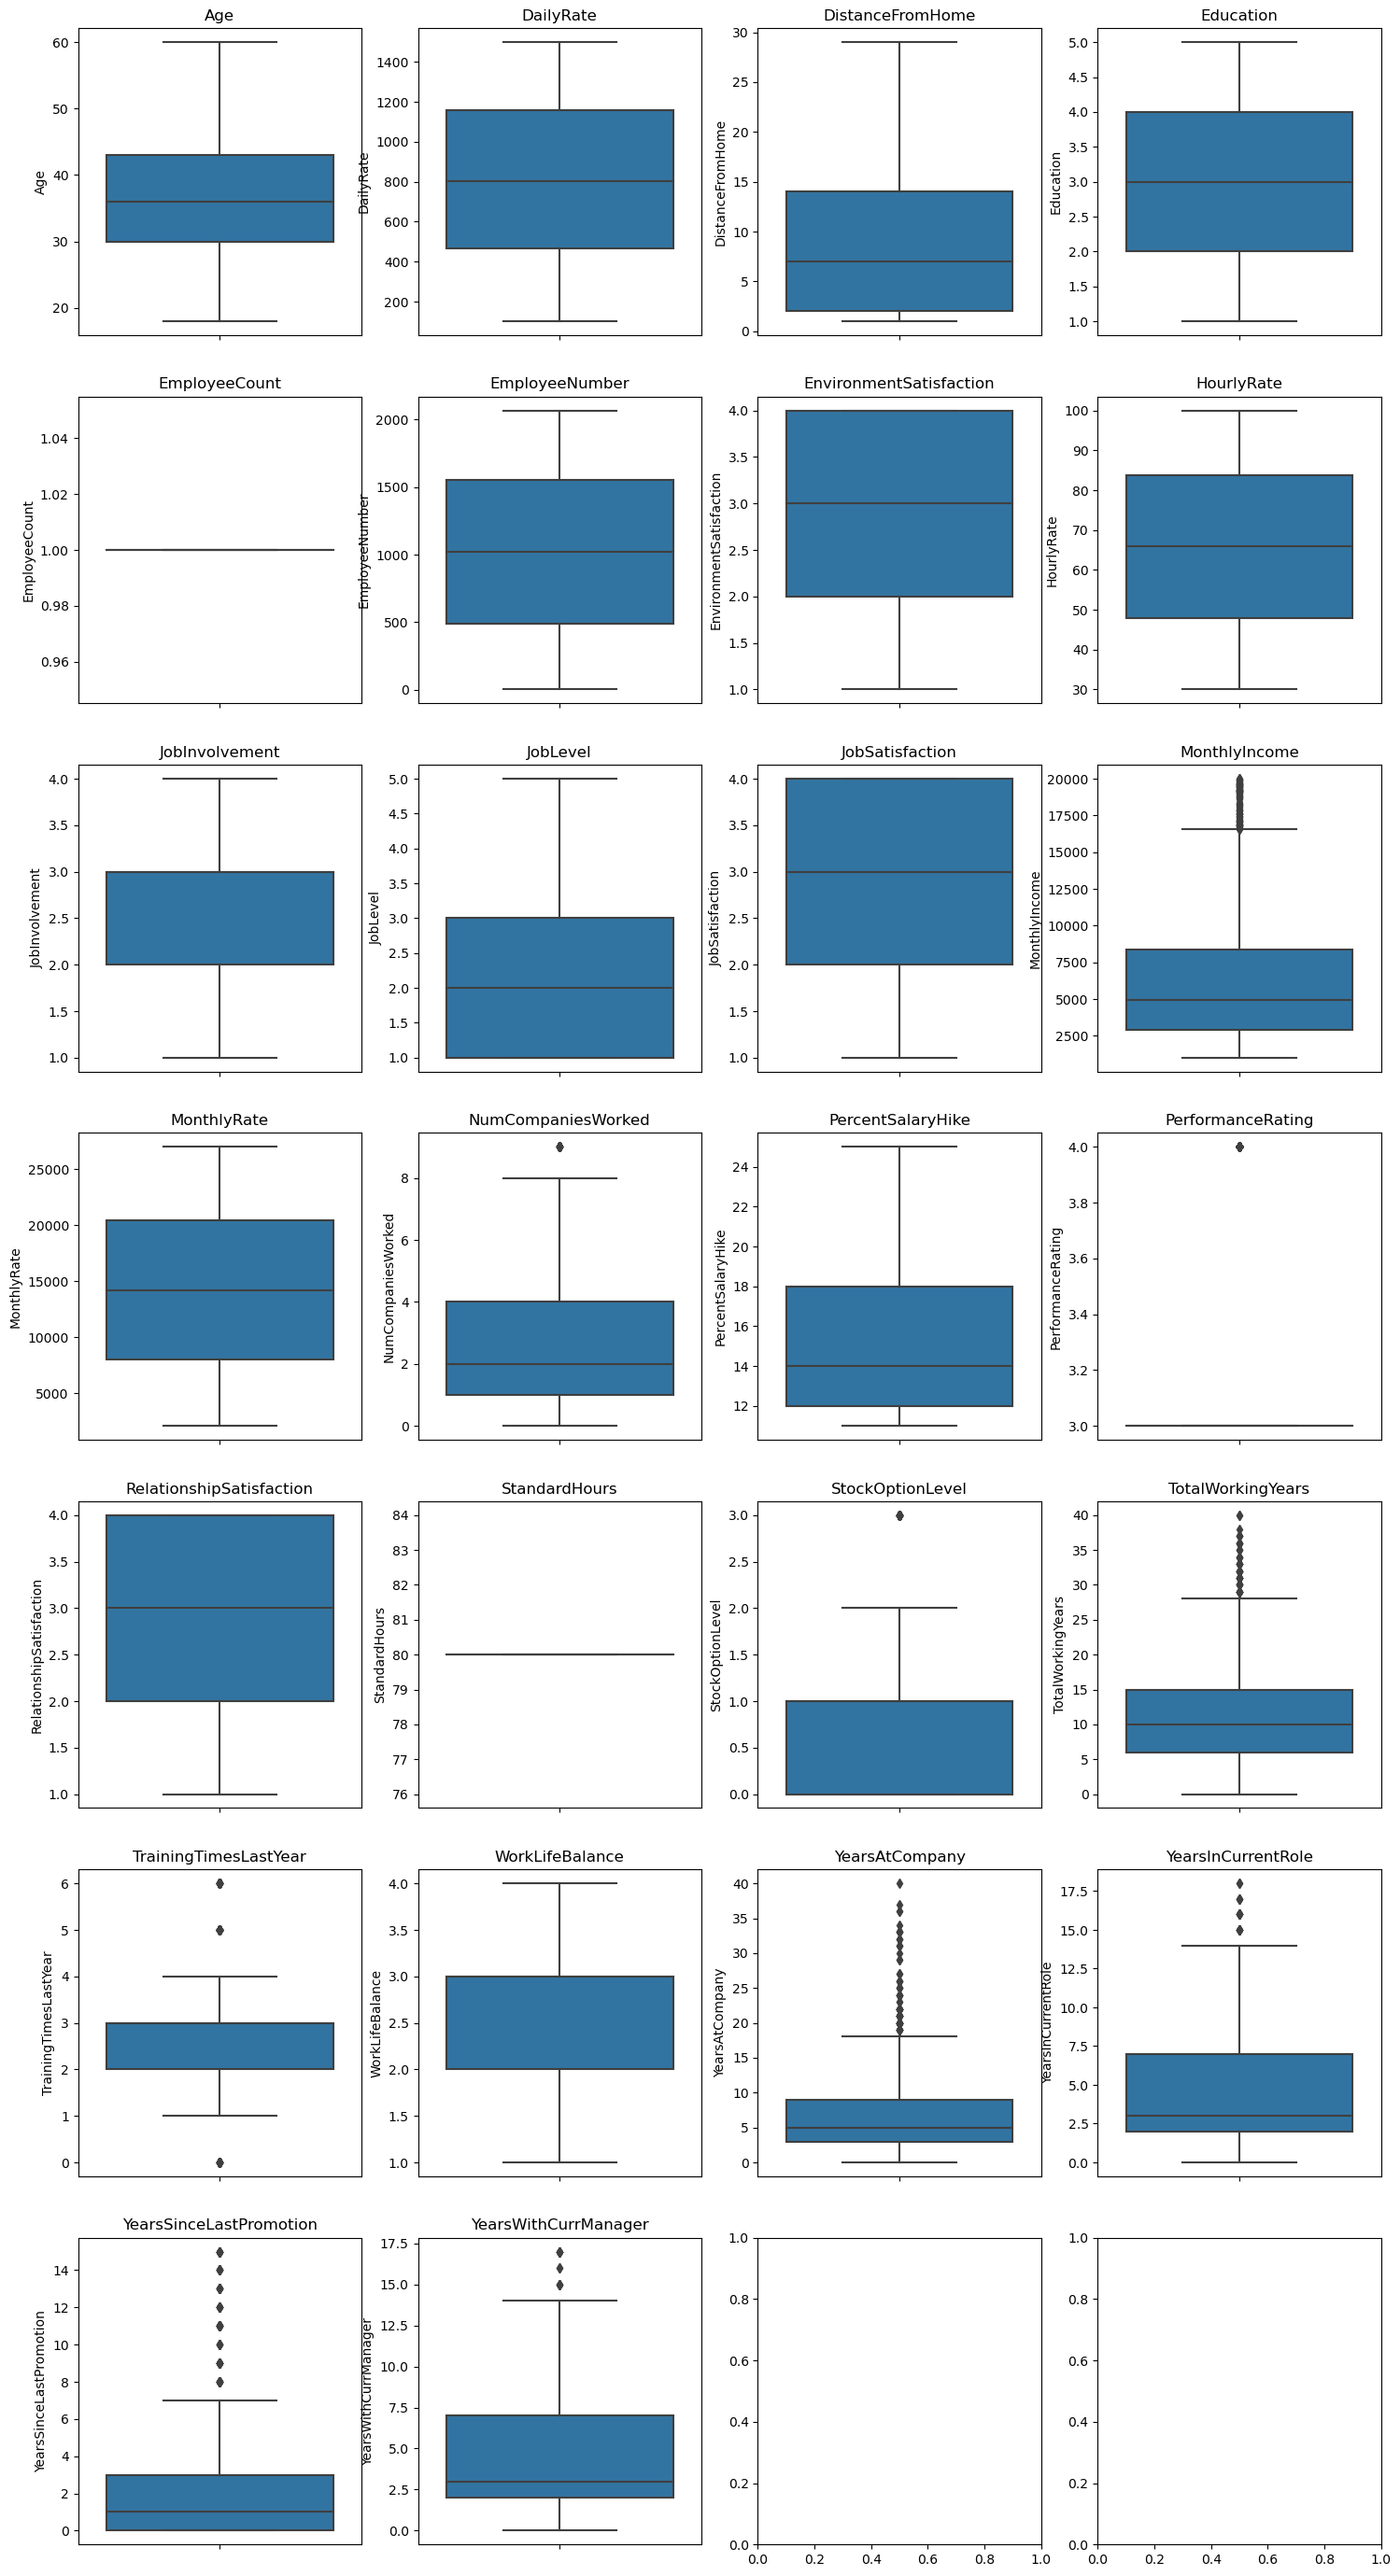

In [42]:
fig, axs = plt.subplots(7, 4, figsize=(18, 5*7))
axs = axs.flatten()
for i, col in enumerate(data._get_numeric_data().columns):
    sns.boxplot(data = data, y = data[col], ax = axs[i])
    axs[i].set_title(col)
plt.show()

Nhận xét:
- EmployeeCount luôn luôn bằng 1, StandardHours luôn luôn bằng 80.
- Biến như PerformanceRating hầu hết có giá trị là 3, môt số ít có giá trị là 4.
- Biến MonthlyIncome, TotalWorkingYears và YearsAtCompany có nhiều outlier. Các biến khác liên quan đến năm làm việc như YearsInCurrentRole, YearsScinceLastPromotion... cũng có nhiều outlier
- Mỗi biến có mỗi cách phân bố khác nhau, 

### Đối với các cột kiểu categorical

In [44]:
def col_info(col, array):
    temp = pd.DataFrame(array[col])
    temp = temp.dropna()
    temp = np.array(temp[col])
    data = []
    # num_values
    temp = np.unique(temp, return_counts=True)
    data.append(len(temp[0]))
    # value
    temp = pd.Series(data = temp[1], index = temp[0])
    data.append(temp)
    # num_values
    return data

In [45]:
cat_col_info_df = pd.DataFrame(index = ['num_values', 'value'])
for i in data.select_dtypes(include=['object']):
    cat_col_info_df[i] = col_info(i, data)

cat_col_info_df

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
num_values,2,3,3,6,2,9,3,1,2
value,No 1233 Yes 237 dtype: int64,Non-Travel 150 Travel_Frequently 277 Travel_Rarely 1043 dtype: int64,Human Resources 63 Research & Development 961 Sales 446 dtype: int64,Human Resources 27 Life Sciences 606 Marketing 159 Medical 464 Other 82 Technical Degree 132 dtype: int64,Female 588 Male 882 dtype: int64,Healthcare Representative 131 Human Resources 52 Laboratory Technician 259 Manager 102 Manufacturing Director 145 Research Director 80 Research Scientist 292 Sales Executive 326 Sales Representative 83 dtype: int64,Divorced 327 Married 673 Single 470 dtype: int64,Y 1470 dtype: int64,No 1054 Yes 416 dtype: int64


Ta vẽ biểu đồ cột để trực quan sự phân bố các giá trị categorical

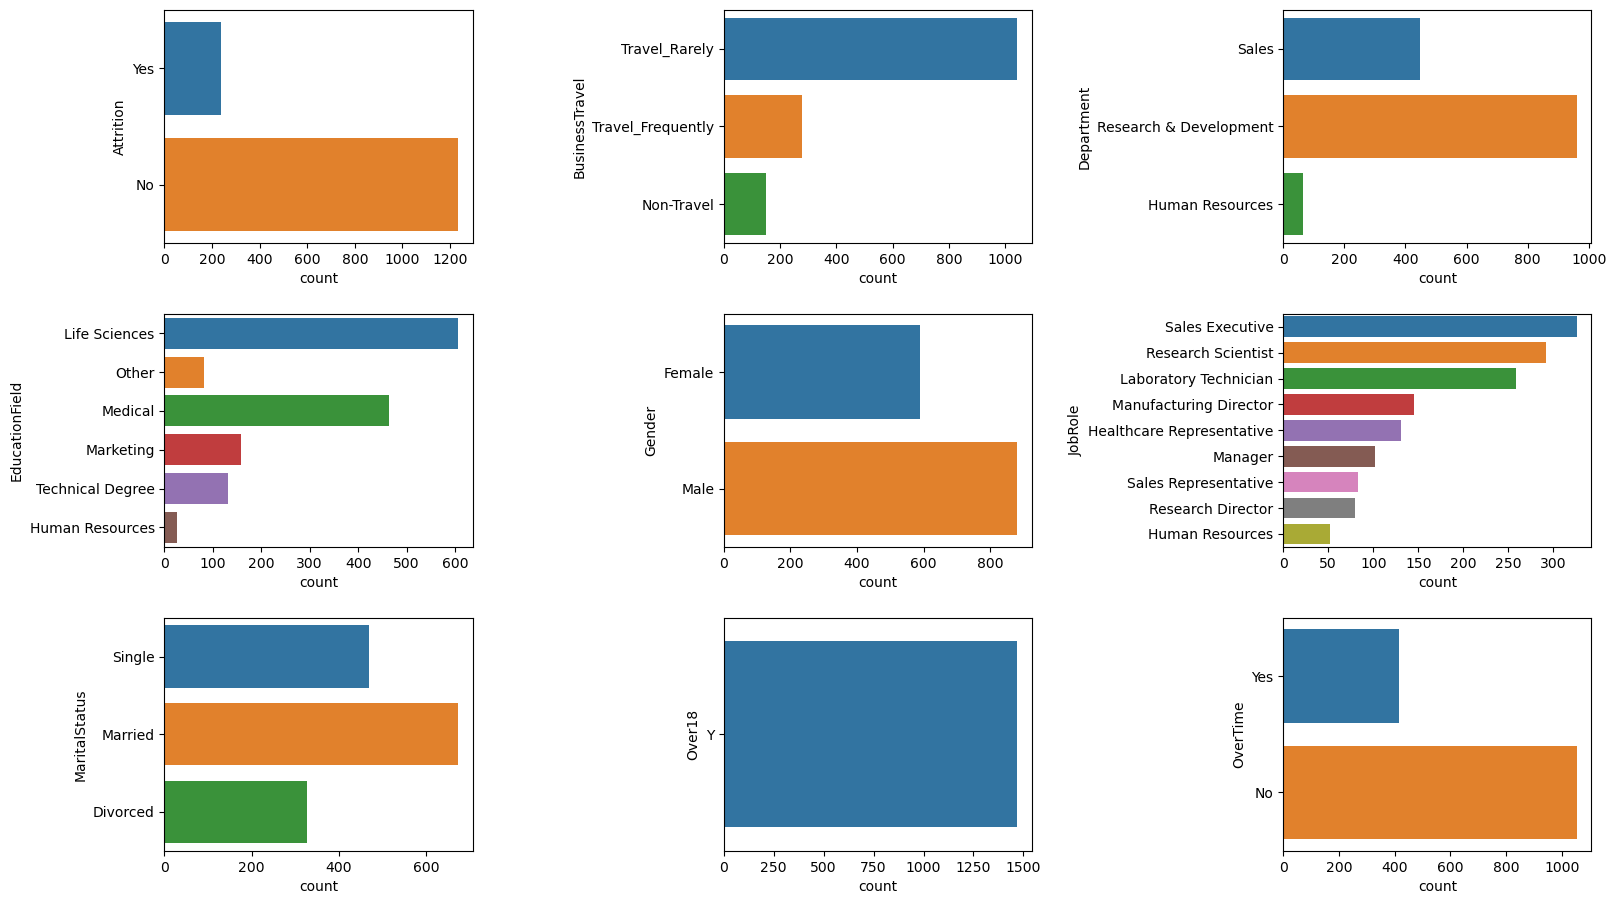

In [81]:
fig, axs = plt.subplots(3, 3, figsize=(15, 3*3))
fig.tight_layout(w_pad=15.0, h_pad = 3)

axs = axs.flatten()
for i, col in enumerate(data.select_dtypes(include=['object']).columns):
    chart = sns.countplot(data = data, y = col, ax = axs[i])
plt.show()

Nhận xét:
- Tất cả nhân viên đều trên 18 tuổi.
- Số nhân viên nam nhiều hơn nhân viên nữ.
- Đa số nhân viên đều đã kết hôn.
- Đa số nhân viên đều có khả năng làm việc thêm ngoài giờ.
- Nhân viên của phòng research & developement là đông nhất, phòng HR ít nhất và ít hơn rất nhiều so với các phòng - Đa số nhân viên trong danh sách này đều đã rời khỏi công ty.
- Các biến dữ liệu đều ổn và không có gì bất thường.
- Tất cả các biến categorical đều không có gì bất thường.